# Fashion Classification
Introduction in the problems

# Tensorflow and Keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

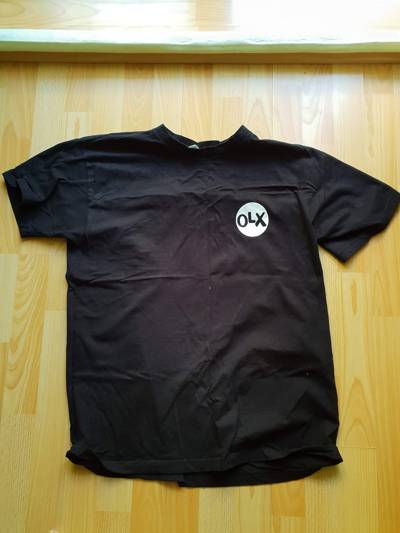

In [3]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

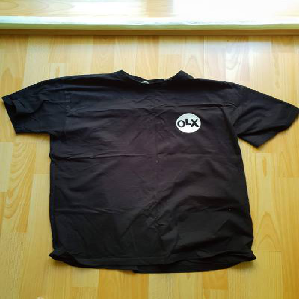

In [4]:
load_img(fullname, target_size=(299,299))

In [5]:
img = load_img(fullname, target_size=(299,299))

In [6]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x29CAD0B8C40>


In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

In [8]:
x[1]

array([[188, 179, 110],
       [187, 178, 109],
       [186, 177, 108],
       [185, 176, 107],
       [186, 177, 108],
       [186, 177, 108],
       [186, 177, 108],
       [187, 178, 109],
       [188, 179, 110],
       [191, 182, 113],
       [196, 187, 118],
       [197, 188, 119],
       [191, 183, 120],
       [198, 190, 127],
       [202, 194, 132],
       [205, 196, 137],
       [202, 195, 140],
       [202, 195, 141],
       [202, 196, 144],
       [203, 197, 149],
       [202, 198, 151],
       [203, 199, 154],
       [205, 200, 158],
       [205, 200, 158],
       [199, 200, 158],
       [199, 201, 161],
       [200, 202, 162],
       [200, 202, 163],
       [200, 204, 167],
       [200, 204, 169],
       [199, 203, 168],
       [199, 204, 172],
       [201, 206, 174],
       [201, 208, 177],
       [204, 210, 182],
       [204, 210, 182],
       [202, 210, 186],
       [200, 208, 185],
       [200, 208, 185],
       [202, 210, 189],
       [210, 217, 199],
       [212, 219

# Pre-Trained Convolutional Neural Networks

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

In [11]:
X = np.array([x]) # The model accepts batch of image, need to set it an array

In [12]:
X = preprocess_input(X) # converted -1 to 1 from 0 to 255

In [13]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [14]:
pred =  model.predict(X)

1/1 [==============================] - 1s 631ms/step


In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792449),
  ('n02916936', 'bulletproof_vest', 0.039600264),
  ('n04370456', 'sweatshirt', 0.03529962),
  ('n03710637', 'maillot', 0.010884134),
  ('n04525038', 'velvet', 0.0018057615)]]

# Convolutional Neural Networks
Explaining CNN theory, notes are in the gdocx

# Transfer Learning

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train/', target_size=(150,150), batch_size=32)

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
next(train_ds)

(array([[[[-0.09019607, -0.1372549 , -0.23137254],
          [-0.06666666, -0.11372548, -0.20784312],
          [ 0.15294123,  0.10588241,  0.01176476],
          ...,
          [ 0.1686275 ,  0.11372554, -0.02745098],
          [ 0.09803927,  0.04313731, -0.09803921],
          [ 0.14509809,  0.09019613, -0.05098039]],
 
         [[-0.06666666, -0.11372548, -0.20784312],
          [-0.10588235, -0.15294117, -0.24705881],
          [ 0.15294123,  0.10588241,  0.01176476],
          ...,
          [ 0.19215691,  0.13725495, -0.00392157],
          [ 0.19215691,  0.13725495, -0.00392157],
          [ 0.00392163, -0.05098039, -0.19215685]],
 
         [[ 0.1686275 ,  0.12156868,  0.02745104],
          [ 0.06666672,  0.0196079 , -0.0745098 ],
          [-0.11372548, -0.1607843 , -0.25490195],
          ...,
          [ 0.18431377,  0.12941182, -0.01176471],
          [ 0.24705887,  0.19215691,  0.05098045],
          [ 0.24705887,  0.19215691,  0.05098045]],
 
         ...,
 
         [[-

In [20]:
X, y = next(train_ds)

In [21]:
X.shape , y.shape

((32, 150, 150, 3), (32, 10))

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/', target_size=(150,150), batch_size=32, shuffle=False)

Found 341 images belonging to 10 classes.


In [23]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
 )

base_model.trainable = False # Don't change the convolution layers

In [24]:
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D() # To make a feature vector
vectors = pooling(base)
# vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors) # To make a prediction 

model = keras.Model(inputs, outputs)

In [25]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [26]:
preds.shape

(32, 10)

In [27]:
preds[0] # random things, because we haven't train the model yet. Use optimizer to adjust the weights

array([ 1.02857   , -0.58582556,  0.35533226,  0.00595468,  0.04276001,
        0.0177125 , -0.44674337,  0.24201779,  0.73947006,  0.1770553 ],
      dtype=float32)

In [28]:
learning_rate = 0.01

# To know the best weights we need to use loss function
loss = keras.losses.CategoricalCrossentropy(from_logits=True) 

# to compute and adjust the weights, to do that optimizer will optimize the loss function to get the lowest number
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)



In [29]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [30]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 67s 676ms/step - loss: 1.2234 - accuracy: 0.6806 - val_loss: 0.7783 - val_accuracy: 0.7566
Epoch 2/10
96/96 [==============================] - 58s 602ms/step - loss: 0.6140 - accuracy: 0.8165 - val_loss: 0.8733 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 59s 611ms/step - loss: 0.3722 - accuracy: 0.8771 - val_loss: 1.0246 - val_accuracy: 0.7742
Epoch 4/10
96/96 [==============================] - 59s 619ms/step - loss: 0.2218 - accuracy: 0.9208 - val_loss: 1.0854 - val_accuracy: 0.7595
Epoch 5/10
96/96 [==============================] - 61s 639ms/step - loss: 0.1487 - accuracy: 0.9475 - val_loss: 0.9255 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 60s 627ms/step - loss: 0.0923 - accuracy: 0.9694 - val_loss: 0.8688 - val_accuracy: 0.8270
Epoch 7/10
96/96 [==============================] - 64s 663ms/step - loss: 0.0706 - accuracy: 0.9762 - val_loss: 1.0013 - val_accuracy: 0.7977

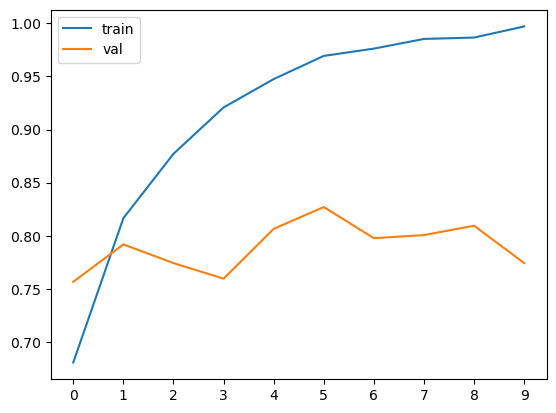

In [31]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# Adjusting the Learning Rate

In [23]:
def make_model(learning_rate=0.01):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )

    base_model.trainable = False # Don't change the convolution layers

    ####################################################################### CREATE ARCHITECTURE
    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    pooling = keras.layers.GlobalAveragePooling2D() # To make a feature vector
    vectors = pooling(base)

    outputs = keras.layers.Dense(10)(vectors) # To make a prediction 

    model = keras.Model(inputs, outputs)
    ####################################################################### END OF ARCHITIECTURE
    
    # To know the best weights we need to use loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) 

    # to compute and adjust the weights, to do that optimizer will optimize the loss function to get the lowest number
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model



In [34]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

Epoch 1/10
96/96 [==============================] - 58s 584ms/step - loss: 1.8747 - accuracy: 0.3585 - val_loss: 1.5317 - val_accuracy: 0.5220
Epoch 2/10
96/96 [==============================] - 51s 527ms/step - loss: 1.3563 - accuracy: 0.5658 - val_loss: 1.1999 - val_accuracy: 0.6510
Epoch 3/10
96/96 [==============================] - 51s 531ms/step - loss: 1.1217 - accuracy: 0.6470 - val_loss: 1.0258 - val_accuracy: 0.7009
Epoch 4/10
96/96 [==============================] - 52s 545ms/step - loss: 0.9848 - accuracy: 0.6910 - val_loss: 0.9185 - val_accuracy: 0.7390
Epoch 5/10
96/96 [==============================] - 53s 554ms/step - loss: 0.8933 - accuracy: 0.7177 - val_loss: 0.8478 - val_accuracy: 0.7625
Epoch 6/10
96/96 [==============================] - 53s 551ms/step - loss: 0.8273 - accuracy: 0.7363 - val_loss: 0.7994 - val_accuracy: 0.7742
Epoch 7/10
96/96 [==============================] - 53s 551ms/step - loss: 0.7753 - accuracy: 0.7507 - val_loss: 0.7615 - val_accuracy: 0.7889

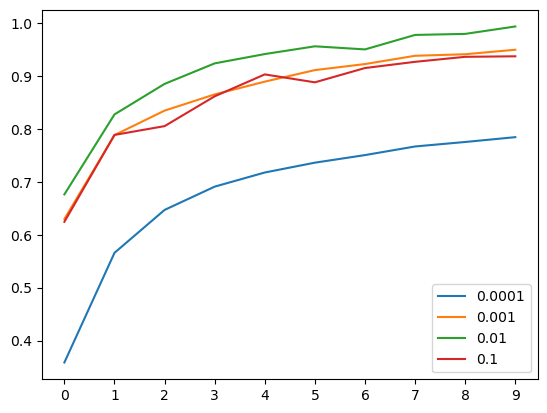

In [35]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

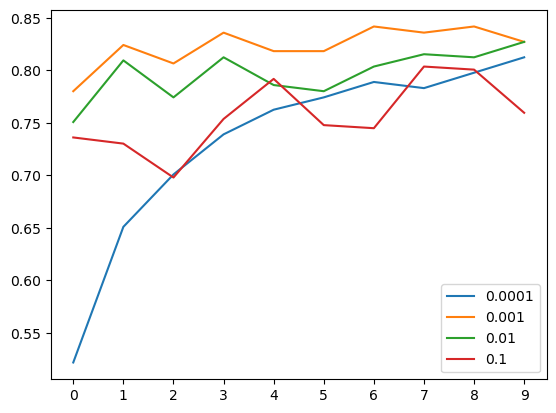

In [36]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

In [37]:
del scores[0.1]
del scores[0.0001]

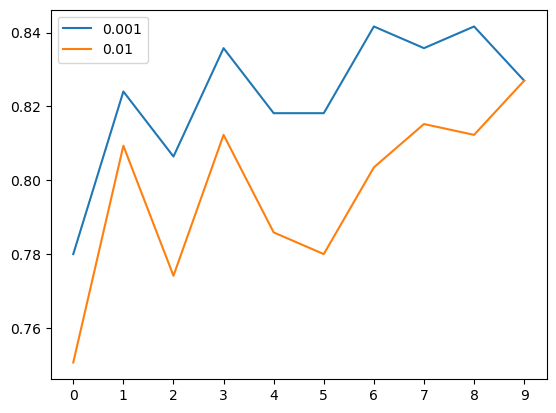

In [38]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

In [24]:
learning_rate = 0.001 # The best learning rate

# CheckPoint

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [25]:
checkpoint=keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy')

In [26]:
learning_rate=0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data = val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 76s 748ms/step - loss: 1.1203 - accuracy: 0.6219 - val_loss: 0.7278 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 68s 708ms/step - loss: 0.6393 - accuracy: 0.7787 - val_loss: 0.6401 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 64s 668ms/step - loss: 0.5086 - accuracy: 0.8354 - val_loss: 0.5834 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 62s 648ms/step - loss: 0.4313 - accuracy: 0.8628 - val_loss: 0.5642 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 60s 624ms/step - loss: 0.3774 - accuracy: 0.8902 - val_loss: 0.5613 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 60s 625ms/step - loss: 0.3290 - accuracy: 0.9078 - val_loss: 0.5424 - val_accuracy: 0.8358
Epoch 7/10
96/96 [==============================] - 64s 662ms/step - loss: 0.2900 - accuracy: 0.9221 - val_loss: 0.5429 - val_accuracy: 0.8240

# Adding More Layers

In [23]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )

    base_model.trainable = False # Don't change the convolution layers

    ####################################################################### CREATE ARCHITECTURE
    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    pooling = keras.layers.GlobalAveragePooling2D() # To make a feature vector
    vectors = pooling(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner) # To make a prediction 

    model = keras.Model(inputs, outputs)
    ####################################################################### END OF ARCHITIECTURE
    
    # To know the best weights we need to use loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) 

    # to compute and adjust the weights, to do that optimizer will optimize the loss function to get the lowest number
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [29]:
scores = {}
learning_rate=0.001

for size in [10, 100]:
    print(size)

    model = make_model(learning_rate=learning_rate,size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 69s 685ms/step - loss: 1.5489 - accuracy: 0.4967 - val_loss: 1.0938 - val_accuracy: 0.6510
Epoch 2/10
96/96 [==============================] - 75s 779ms/step - loss: 0.8852 - accuracy: 0.7096 - val_loss: 0.7346 - val_accuracy: 0.7742
Epoch 3/10
96/96 [==============================] - 70s 734ms/step - loss: 0.6355 - accuracy: 0.7907 - val_loss: 0.6442 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 65s 672ms/step - loss: 0.5202 - accuracy: 0.8279 - val_loss: 0.6229 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 66s 689ms/step - loss: 0.4240 - accuracy: 0.8634 - val_loss: 0.5887 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 70s 730ms/step - loss: 0.3681 - accuracy: 0.8866 - val_loss: 0.5839 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 66s 683ms/step - loss: 0.3092 - accuracy: 0.9100 - val_loss: 0.5812 - val_accuracy: 0.8

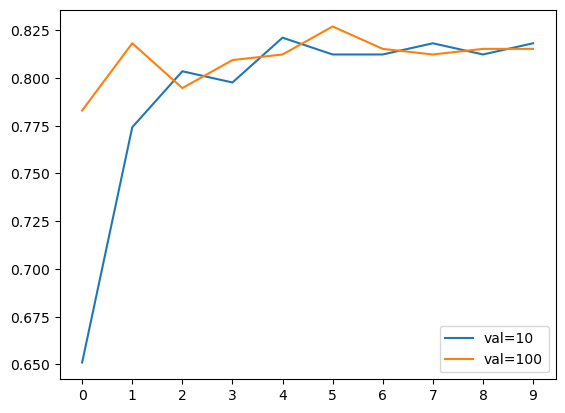

In [32]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

# Regularization and Dropout

In [24]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )

    base_model.trainable = False # Don't change the convolution layers

    ####################################################################### CREATE ARCHITECTURE
    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    pooling = keras.layers.GlobalAveragePooling2D() # To make a feature vector
    vectors = pooling(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)


    outputs = keras.layers.Dense(10)(drop) # To make a prediction 

    model = keras.Model(inputs, outputs)
    ####################################################################### END OF ARCHITIECTURE
    
    # To know the best weights we need to use loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) 

    # to compute and adjust the weights, to do that optimizer will optimize the loss function to get the lowest number
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [25]:
scores = {}
learning_rate=0.001
size = 100

for droprate in [0, 0.5]:
    print(size)

    model = make_model(learning_rate=learning_rate,size_inner=size,
        droprate=droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

100
Epoch 1/10
96/96 [==============================] - 62s 625ms/step - loss: 0.9808 - accuracy: 0.6744 - val_loss: 0.6546 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 56s 587ms/step - loss: 0.5076 - accuracy: 0.8230 - val_loss: 0.6104 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 56s 577ms/step - loss: 0.3534 - accuracy: 0.8840 - val_loss: 0.6256 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 58s 603ms/step - loss: 0.2670 - accuracy: 0.9133 - val_loss: 0.5912 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 57s 597ms/step - loss: 0.1821 - accuracy: 0.9531 - val_loss: 0.5705 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 58s 607ms/step - loss: 0.1278 - accuracy: 0.9723 - val_loss: 0.5688 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 61s 633ms/step - loss: 0.0957 - accuracy: 0.9821 - val_loss: 0.6253 - val_accuracy: 0.

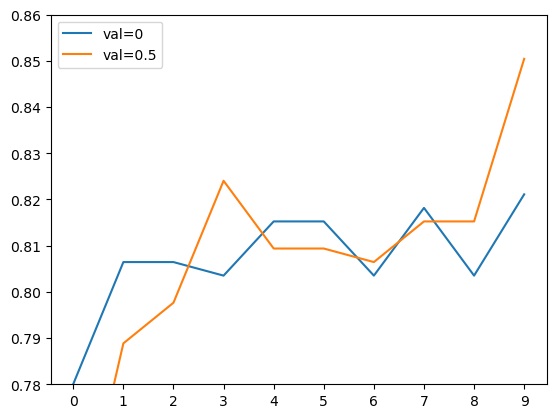

In [26]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.xticks(np.arange(10))
plt.legend()

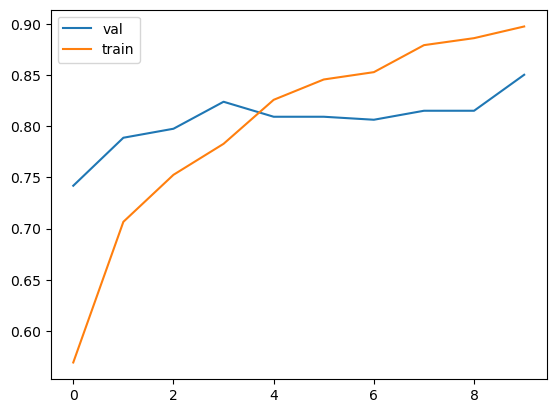

In [31]:
hist = scores[0.50]
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()

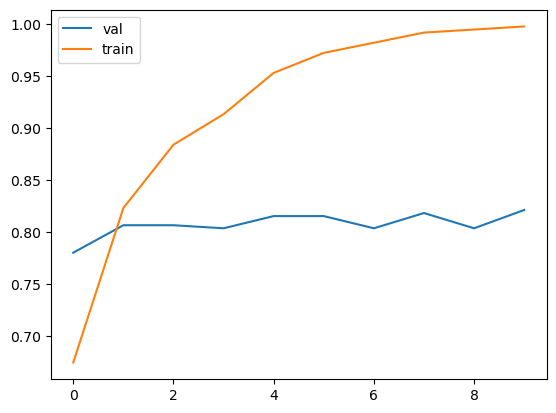

In [32]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()